In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [13]:
# Mod type key and value
BPSK = 'bpsk'
QPSK = 'qpsk'
EPSK = '8psk'

VALID_MOD = [BPSK, QPSK, EPSK]

BPSK_SYM = np.array([-1+0j,1+0j])
# QPSK_SYM = (np.sqrt(2) / 2) * np.array([1+1j, 1-1j, -1+1j, -1-1j])

QPSK_SYM = np.array([
    np.exp(1j * np.pi / 4),      # 45 degrees
    np.exp(1j * 3 * np.pi / 4),  # 135 degrees
    np.exp(1j * 5 * np.pi / 4),  # 225 degrees
    np.exp(1j * 7 * np.pi / 4),  # 315 degrees
])

EPSK_SYM = np.array([
    np.exp(1j * 0),          # 0 degrees
    np.exp(1j * np.pi / 4),  # 45 degrees
    np.exp(1j * np.pi / 2),  # 90 degrees
    np.exp(1j * 3 * np.pi / 4),  # 135 degrees
    np.exp(1j * np.pi),      # 180 degrees
    np.exp(1j * 5 * np.pi / 4),  # 225 degrees
    np.exp(1j * 3 * np.pi / 2),  # 270 degrees
    np.exp(1j * 7 * np.pi / 4)  # 315 degrees
])

# todo add QAM

# Create a mapping dictionary
symbol_to_bits = {
    BPSK: {BPSK_SYM[0]: (0,),   BPSK_SYM[1]: (1,)},
    QPSK: {QPSK_SYM[0]: (0, 0), QPSK_SYM[1]: (0, 1), QPSK_SYM[2]: (1, 0), QPSK_SYM[3]: (1, 1)},
    EPSK: {
        EPSK_SYM[0]: (0, 0, 0),
        EPSK_SYM[1]: (0, 0, 1),
        EPSK_SYM[2]: (0, 1, 0),
        EPSK_SYM[3]: (0, 1, 1),
        EPSK_SYM[4]: (1, 0, 0),
        EPSK_SYM[5]: (1, 0, 1),
        EPSK_SYM[6]: (1, 1, 0),
        EPSK_SYM[7]: (1, 1, 1),
          }
    }

# Example usage:
bpsk_symbol = BPSK_SYM[0]
qpsk_symbol = QPSK_SYM[2]
epsk_symbol = EPSK_SYM[1]

bits_bpsk = symbol_to_bits[BPSK][bpsk_symbol]
bits_qpsk = symbol_to_bits[QPSK][qpsk_symbol]
bits_epsk = symbol_to_bits[EPSK][epsk_symbol]

print("BPSK Symbol:", bpsk_symbol, "Mapped Bits:", bits_bpsk)
print("QPSK Symbol:", qpsk_symbol, "Mapped Bits:", bits_qpsk)
print("8PSK Symbol:", epsk_symbol, "Mapped Bits:", bits_epsk)

# Reverse the symbol-to-bit mapping for BPSK
bits_to_symbol_bpsk = {v: k for k, v in symbol_to_bits[BPSK].items()}

# Reverse the symbol-to-bit mapping for QPSK
bits_to_symbol_qpsk = {v: k for k, v in symbol_to_bits[QPSK].items()}

# Reverse the symbol-to-bit mapping for 8PSK
bits_to_symbol_epsk = {v: k for k, v in symbol_to_bits[EPSK].items()}

# Combine the bit-to-symbol mappings into a single dictionary
bit_to_symbol_map = {
    BPSK: bits_to_symbol_bpsk,
    QPSK: bits_to_symbol_qpsk,
    EPSK: bits_to_symbol_epsk,
}

# Example usage:
bits_bpsk = (0,)
bits_qpsk = (1, 0)
bits_epsk = (0, 0, 1)
# symbol_bpsk = bit_to_symbol_map[BPSK][bits_bpsk]
# symbol_qpsk = bit_to_symbol_map[QPSK][bits_qpsk]
symbol_epsk = bit_to_symbol_map[EPSK][bits_epsk]

# print("BPSK Bits:", bits_bpsk, "Mapped Symbol:", symbol_bpsk)
# print("QPSK Bits:", bits_qpsk, "Mapped Symbol:", symbol_qpsk)
print("8PSK Bits:", bits_epsk, "Mapped Symbol:", symbol_epsk)


BPSK Symbol: (-1+0j) Mapped Bits: (0,)
QPSK Symbol: (-0.7071067811865477-0.7071067811865475j) Mapped Bits: (1, 0)
8PSK Symbol: (0.7071067811865476+0.7071067811865475j) Mapped Bits: (0, 0, 1)
8PSK Bits: (0, 0, 1) Mapped Symbol: (0.7071067811865476+0.7071067811865475j)


In [15]:
for i in range (2):
    for j in range (2):
        for k in range (2):
            bits_epsk = (i, j, k)
            try:
                symbol_epsk = bit_to_symbol_map[EPSK][bits_epsk]
                print(f"8PSK Bits: {bits_epsk} mapped symbol: {symbol_epsk}")
            except Exception as e:
                print(f"8PSK Bits: {bits_epsk} mapped symbol error: {e}")

8PSK Bits: (0, 0, 0) mapped symbol: (1+0j)
8PSK Bits: (0, 0, 1) mapped symbol: (0.7071067811865476+0.7071067811865475j)
8PSK Bits: (0, 1, 0) mapped symbol: (6.123233995736766e-17+1j)
8PSK Bits: (0, 1, 1) mapped symbol: (-0.7071067811865475+0.7071067811865476j)
8PSK Bits: (1, 0, 0) mapped symbol: (-1+1.2246467991473532e-16j)
8PSK Bits: (1, 0, 1) mapped symbol: (-0.7071067811865477-0.7071067811865475j)
8PSK Bits: (1, 1, 0) mapped symbol: (-1.8369701987210297e-16-1j)
8PSK Bits: (1, 1, 1) mapped symbol: (0.7071067811865474-0.7071067811865477j)


In [16]:
def _valid_check(mod_typ:str):
    '''check if the modulation type are supported'''
    assert mod_typ in VALID_MOD, f"not supported mode type {mod_typ}"
    pass

In [17]:
def symbol_rate (mod_typ = BPSK):
    if    mod_typ == BPSK: return 1
    elif  mod_typ == QPSK: return 2
    elif  mod_typ == EPSK: return 3
    else:  return None

In [18]:
def gen_pattern (mod_typ = BPSK):
    if    mod_typ == BPSK: return BPSK_SYM
    elif  mod_typ == QPSK: return QPSK_SYM
    elif  mod_typ == EPSK: return EPSK_SYM
    else:  return None

In [19]:
def bits_to_symbols(bits, mod_type=BPSK):
    _valid_check(mod_type)
    bit_num_per_symbol = symbol_rate (mod_type)

    symbols = []
    for i in range(0, len(bits), bit_num_per_symbol):
        symbol_bits = bits[i:i+bit_num_per_symbol]
        if mod_type == BPSK:
            symbol = np.array([-1 + 0j]) if symbol_bits[0] else np.array([1 + 0j])
        elif mod_type == QPSK:
            phase  = np.pi / 4 * (2 * symbol_bits[0] + symbol_bits[1])
            symbol = np.array([np.exp(1j * phase)])
        elif mod_type == EPSK:
            gray_code = symbol_bits.dot(2 ** np.arange(len(symbol_bits)))
            phase = 2 * np.pi * gray_code / 8
            symbol = np.array([np.exp(1j * phase)])
        symbols.append(symbol)
    
    return symbols

    

In [20]:
def bits_to_symbols_1(bits, mod_type=BPSK):
    _valid_check(mod_type)
    bit_num_per_symbol = symbol_rate (mod_type)
    
    symbols = []
    for i in range(0, len(bits), bit_num_per_symbol):
        symbol_bits = tuple(bits[i:i+bit_num_per_symbol])
        print(f"len(symbol_bits)= {len(symbol_bits)}")
        if   mod_type == BPSK:
            symbol = bit_to_symbol_map[BPSK][symbol_bits]
        elif mod_type == QPSK:
            symbol = bit_to_symbol_map[QPSK][symbol_bits]
        elif mod_type == EPSK:
            symbol = bit_to_symbol_map[EPSK][symbol_bits]

        symbols.append(symbol)
    
    return symbols

In [21]:
def gen_binary_signal(num_bits, pattern=None):
    if pattern is None:
        signal = np.random.randint(0, 2, num_bits)
    else:
        pattern_len = len(pattern)
        repetitions = num_bits // pattern_len
        signal = np.tile(pattern, repetitions)
        remainder = num_bits % pattern_len
        signal = np.concatenate((signal, pattern[:remainder]))
    return signal

In [22]:
# Example usage:
num_bits = 4

# Generate a signal with a random pattern
random_binary_signal = gen_binary_signal(num_bits)
print("Random Pattern:", random_binary_signal)

# Generate a signal with a specified pattern
custom_pattern = [0, 1]
custom_binary_signal = gen_binary_signal(num_bits, pattern=custom_pattern)
print("Custom Pattern:", custom_binary_signal)

Random Pattern: [1 0 1 0]
Custom Pattern: [0. 1. 0. 1.]


In [23]:
def gen_raw_signal(num_symbs, pattern=None, mod_typ=BPSK):
    _valid_check(mod_typ)
    bit_num_per_symbol = symbol_rate (mod_typ)
    num_bits = num_symbs * bit_num_per_symbol
    bin_signal = gen_binary_signal(num_bits, pattern)
    symbols = bits_to_symbols_1(bin_signal, mod_typ)
#     print(symbols)
    
    return symbols
    

In [24]:
# Example usage:
num_symbls = 4

# Generate a signal with a random pattern
random_symbol_signal = gen_raw_signal(num_symbls, None, EPSK)
print("Random Pattern:", random_symbol_signal)
print(f"symbol length = {len(random_symbol_signal)}\n")

# Generate a signal with a specified pattern
custom_pattern = [0, 1]
custom_binary_signal = gen_raw_signal(num_symbls, custom_pattern, EPSK)
print("Custom Pattern:", custom_binary_signal)
print(f"symbol length = {len(custom_binary_signal)}")

len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
Random Pattern: [(-0.7071067811865475+0.7071067811865476j), (1+0j), (-1+1.2246467991473532e-16j), (6.123233995736766e-17+1j)]
symbol length = 4

len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
Custom Pattern: [(6.123233995736766e-17+1j), (-0.7071067811865477-0.7071067811865475j), (6.123233995736766e-17+1j), (-0.7071067811865477-0.7071067811865475j)]
symbol length = 4


In [25]:
def upsample_signal(signal, upsample_factor=4):
    
    upsampled_signal = np.repeat(signal, upsample_factor)
    
    print(upsampled_signal)
    
#     # Replace all values with the constant_value
#     upsampled_signal = np.where(upsampled_signal == 0, constant_value, upsampled_signal)
#     print(upsampled_signal)
    
    return upsampled_signal

In [37]:
# Example usage:
num_symbls = 10
upsample_factor = 8

# Generate a signal with a random pattern
random_symbol_signal = gen_raw_signal(num_symbls, None, '8psk')
print("random_symbol_signal:", random_symbol_signal)
upsampled_random_symbol_signal = upsample_signal(random_symbol_signal, upsample_factor)
print("upsampled_random_symbol_signal:", upsampled_random_symbol_signal)

# Generate a signal with a specified pattern
custom_pattern = [0, 1]
custom_symbol_signal = gen_raw_signal(num_symbls, custom_pattern, '8psk')
print("custom_binary_signal:", custom_binary_signal)
upsampled_custom_symbol_signal = upsample_signal(custom_symbol_signal, 2)
print("upsampled_custom_symbol_signal:", upsampled_custom_symbol_signal)

len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
len(symbol_bits)= 3
random_symbol_signal: [(-0.7071067811865475+0.7071067811865476j), (-1+1.2246467991473532e-16j), (0.7071067811865474-0.7071067811865477j), (0.7071067811865476+0.7071067811865475j), (6.123233995736766e-17+1j), (-1.8369701987210297e-16-1j), (-1+1.2246467991473532e-16j), (0.7071067811865474-0.7071067811865477j), (-1.8369701987210297e-16-1j), (-1.8369701987210297e-16-1j)]
[-7.07106781e-01+7.07106781e-01j -7.07106781e-01+7.07106781e-01j
 -7.07106781e-01+7.07106781e-01j -7.07106781e-01+7.07106781e-01j
 -7.07106781e-01+7.07106781e-01j -7.07106781e-01+7.07106781e-01j
 -7.07106781e-01+7.07106781e-01j -7.07106781e-01+7.07106781e-01j
 -1.00000000e+00+1.22464680e-16j -1.00000000e+00+1.22464680e-16j
 -1.00000000e+00+1.22464680e-16j -1.00000000e+00+1.22464680e-16j
 -1.00000000e+00+1.22464680e-16j -1.0000

In [38]:
# duration = 10  # Signal duration in seconds
# symbol_rate = 2  # Symbol rate in symbols per second
# random_pattern = False  # Use None for random pattern, or provide a fixed pattern as a list
# upsample_factor = 4

# # signal = upsample_bpsk_gen(duration, symbol_rate, random_pattern)
# signal = bb_gen(duration, random_pattern, 'qpsk')
# plot_timing(signal, symbol_rate)

In [39]:
# Create the QPSK symbol map:
# https://www.wavewalkerdsp.com/2022/06/08/building-a-psk-and-qam-modulator-in-python/
# QPSKMapper =(np.sqrt(2) / 2) * np.array([1+1j, 1-1j, -1+1j, -1-1j])

SymbolMapper = gen_pattern('qpsk')

In [40]:
def generate_rrc_filter(N, alpha):
    n = np.arange(-N/2, N/2)
    h = np.sinc(n) * np.cos(np.pi * alpha * n) / (1 - (2 * alpha * n)**2)
    return h / np.sum(h)

In [41]:
def filer_gen(type_n: str = 'rrc')
    if type_n == 'rrc': pass
#     pulseShape

SyntaxError: invalid syntax (4237541674.py, line 1)

In [42]:
def bb_gen_bak(symbol_num: int, upsample: int = 4):

    # Randomly generate some QPSK symbols:
#     ns = 16
    mapIndex = np.random.randint(0, len(SymbolMapper), symbol_num) 
    print(f"mapIndex={mapIndex}")
    Symbols = SymbolMapper[mapIndex]
    print(f"Symbols={Symbols}")
    # Define the samples per symbol, which is also the pulse shaping filter length:
#     upsample = 4
    # Upsample the symbols:

    SymbolsUpsampled = np.zeros(symbol_num*upsample, dtype = complex)

    print(f"SymbolsUpsampled = {SymbolsUpsampled}")
    SymbolsUpsampled[::upsample] = Symbols
    print(f"SymbolsUpsampled = {SymbolsUpsampled}")
    #Define the pulse shaping filter:

#     pulseShape = np.ones(upsample)
    
#     # Apply the pulse shaping filter:
#     Signal = np.convolve(SymbolsUpsampled, pulseShape)
    
    # Define the raised cosine pulse shaping filter

    alpha = 0.35  # Adjust alpha based on your needs
    num_symbols = symbol_num * upsample
    rrc_filter = generate_rrc_filter(num_symbols, alpha)
    print(f'rrc_filter = {rrc_filter}')
    Signal = np.convolve(SymbolsUpsampled, rrc_filter, mode='full')[:len(SymbolsUpsampled)]
    
    return Signal

In [43]:
def bb_gen(symbol_num: int, upsample: int = 4):
    """
    Generate a Baseband digital modulated signal.

    Parameters:
        duration (float): Duration of the signal in seconds.
        symbol_rate (float): Symbol rate in symbols per second.
        random_pattern (True or False): If True, generate a list of 0s and 1s randomly, otherwise by [0,1].

    Returns:
        np.array: BPSK signal values.
    """
    # Randomly generate some QPSK symbols:
#     ns = 16
    mapIndex = np.random.randint(0, len(SymbolMapper), symbol_num) 
    print(f"mapIndex={mapIndex}")
    Symbols = SymbolMapper[mapIndex]
    print(f"Symbols={Symbols}")
    # Define the samples per symbol, which is also the pulse shaping filter length:
#     upsample = 4
    # Upsample the symbols:

    SymbolsUpsampled = np.zeros(symbol_num*upsample, dtype = complex)

    print(f"SymbolsUpsampled = {SymbolsUpsampled}")
    SymbolsUpsampled[::upsample] = Symbols
    print(f"SymbolsUpsampled = {SymbolsUpsampled}")
    #Define the pulse shaping filter:

#     pulseShape = np.ones(upsample)
    
#     # Apply the pulse shaping filter:
#     Signal = np.convolve(SymbolsUpsampled, pulseShape)
    
    # Define the raised cosine pulse shaping filter

    alpha = 0.35  # Adjust alpha based on your needs
    num_symbols = symbol_num * upsample
    rrc_filter = generate_rrc_filter(num_symbols, alpha)
    print(f'rrc_filter = {rrc_filter}')
    Signal = np.convolve(SymbolsUpsampled, rrc_filter, mode='full')[:len(SymbolsUpsampled)]
    
    return Signal

In [44]:
complex_signal = bb_gen(8, 4)

mapIndex=[1 0 0 3 1 3 0 2]
Symbols=[-0.70710678+0.70710678j  0.70710678+0.70710678j  0.70710678+0.70710678j
  0.70710678-0.70710678j -0.70710678+0.70710678j  0.70710678-0.70710678j
  0.70710678+0.70710678j -0.70710678-0.70710678j]
SymbolsUpsampled = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]
SymbolsUpsampled = [-0.70710678+0.70710678j  0.        +0.j          0.        +0.j
  0.        +0.j          0.70710678+0.70710678j  0.        +0.j
  0.        +0.j          0.        +0.j          0.70710678+0.70710678j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.70710678-0.70710678j  0.        +0.j          0.        +0.j
  0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j          0.        +0.j          0.70710678-0.70710678j
  0.        +0.j          0.   

In [45]:
complex_signal

array([-6.84491947e-20+6.84491947e-20j, -5.23444595e-19+5.23444595e-19j,
        2.75832782e-19-2.75832782e-19j,  6.49116963e-20-6.49116963e-20j,
       -2.52136436e-19+3.89034825e-19j,  2.05597767e-18-1.00908848e-18j,
       -2.75832782e-19-2.75832782e-19j, -6.99698859e-19+5.69875467e-19j,
        1.12355184e-18-3.45482186e-19j, -8.21691838e-19-1.19648512e-18j,
       -1.85126232e-18+1.29959676e-18j,  2.30239628e-18-1.16264535e-18j,
        8.99812812e-19-1.72767557e-18j, -9.18031969e-18+5.74046025e-18j,
        1.81765262e-17-1.50256671e-17j, -2.56997079e-17+2.35042406e-17j,
       -7.07106781e-01+7.07106781e-01j, -1.87966023e-17+3.43894781e-17j,
        1.85126232e-18-3.24542620e-17j,  1.55204060e-17+3.00886774e-17j,
        7.07106781e-01+7.07106781e-01j,  3.61219990e-17+2.89197953e-17j,
       -3.40296916e-17-3.34780260e-17j,  3.02760741e-17+3.47657201e-17j,
        7.07106781e-01+7.07106781e-01j,  2.93318973e-17+1.73240754e-17j,
       -3.40296916e-17+2.87502630e-18j,  3.61684298

In [46]:
def plot_complex(complex_signal):
    # Separate the real and imaginary parts
    real_part = np.real(complex_signal)
    imaginary_part = np.imag(complex_signal)

    # Create timing bins (assuming 16 bins for your data)
    timing_bins = range(len(complex_signal))

    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot the real part with "*" markers
    ax1.plot(timing_bins, real_part, label='Real Part', color='blue', marker='*')
    ax1.set_ylabel('Real Part')
    ax1.legend()
    ax1.grid(True)
    ax1.set_title('Real Part vs. Timing Bin')

    # Plot the imaginary part with "*" markers
    ax2.plot(timing_bins, imaginary_part, label='Imaginary Part', color='orange', marker='*')
    ax2.set_xlabel('Timing Bin')
    ax2.set_ylabel('Imaginary Part')
    ax2.legend()
    ax2.grid(True)
    ax2.set_title('Imaginary Part vs. Timing Bin')

    plt.tight_layout()
    plt.show()

In [47]:
def plot_const(complex_signal):
    # Separate the real and imaginary parts
    real_part = np.real(complex_signal)
    imaginary_part = np.imag(complex_signal)
    print(f"number of signal bin: {len(real_part)}")
    
    # Create a constellation plot
    plt.figure(figsize=(6, 6))
    plt.scatter(real_part, imaginary_part, marker='o', color='r')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Constellation Diagram')
    plt.grid(True)
    plt.show()

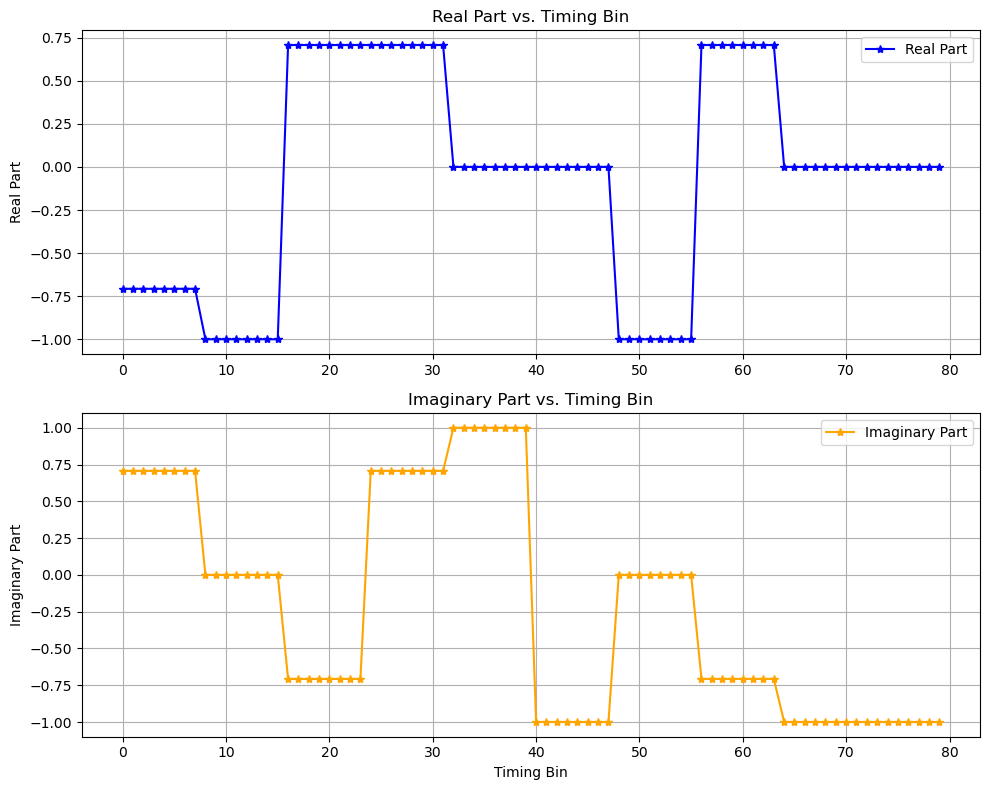

In [48]:
plot_complex(upsampled_random_symbol_signal)

In [49]:
upsampled_random_symbol_signal

array([-7.07106781e-01+7.07106781e-01j, -7.07106781e-01+7.07106781e-01j,
       -7.07106781e-01+7.07106781e-01j, -7.07106781e-01+7.07106781e-01j,
       -7.07106781e-01+7.07106781e-01j, -7.07106781e-01+7.07106781e-01j,
       -7.07106781e-01+7.07106781e-01j, -7.07106781e-01+7.07106781e-01j,
       -1.00000000e+00+1.22464680e-16j, -1.00000000e+00+1.22464680e-16j,
       -1.00000000e+00+1.22464680e-16j, -1.00000000e+00+1.22464680e-16j,
       -1.00000000e+00+1.22464680e-16j, -1.00000000e+00+1.22464680e-16j,
       -1.00000000e+00+1.22464680e-16j, -1.00000000e+00+1.22464680e-16j,
        7.07106781e-01-7.07106781e-01j,  7.07106781e-01-7.07106781e-01j,
        7.07106781e-01-7.07106781e-01j,  7.07106781e-01-7.07106781e-01j,
        7.07106781e-01-7.07106781e-01j,  7.07106781e-01-7.07106781e-01j,
        7.07106781e-01-7.07106781e-01j,  7.07106781e-01-7.07106781e-01j,
        7.07106781e-01+7.07106781e-01j,  7.07106781e-01+7.07106781e-01j,
        7.07106781e-01+7.07106781e-01j,  7.07106781

number of signal bin: 80


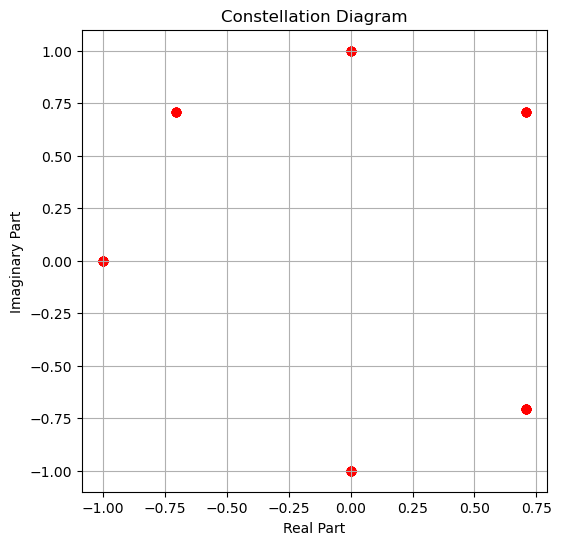

In [50]:
plot_const(upsampled_random_symbol_signal)